### Group members (first and last names):
- ####  *Abdelhak Kermia*

# Introduction
In today’s assignment, you will once again design, train, and evaluate your own Multi-Layer Perceptrons (MLPs). 🤓

Last week, you built and trained an MLP from scratch. This time, we’re taking it **one step further**! You’ll be using **more advanced functions** to track losses and accuracy while incorporating regularization techniques such as **BatchNorm, LayerNorm, and Dropout** to improve generalization.

To complicate things a bit, you’ll also be implementing your MLP as a **Python class**. This might seem slightly more challenging at first, but it will make things much easier later on, especially when experimenting with different architectures.

💡 Get creative with this one! Experiment with different model designs, hyperparameters, and regularization techniques to see how they affect performance. Try **inducing overfitting** first and then applying methods to fix it. 🚀

---
## How to pass the assignment?
Below, you will find the exercise questions. Each question that awards points is numbered and displays the available points in this format: **(0 pts)**.

### Answering Questions
- Provide your answers in the cell directly below each question.
- Use **Markdown** for text-based answers (in **English**).
- Use **code cells** for implementations.
- **Incomplete or incorrect answers receive 0 points.** Partial credit may be awarded at the teacher's discretion.
- Overly detailed answers do not grant extra points. Stick to what is asked.

### Critical Thinking Questions and Bonus Exercises
- Some questions are marked with a 🧠 (Critical Thinking) or a ⭐ (Bonus Exercise). These are for self-reflection and extra practice.
- They are **optional** and do **not** award any points.
- Answering them can help reinforce your understanding.

### Important Rules
- **You may only use packages that have been presented in the assignments.** Using additional packages will result in **0 points**.
- Use of Datasets
  - Follow the dataset instructions carefully.
  - **If no new dataset is provided, continue using the one from the previous question.** Switching datasets without instruction will result in **0 points**.
  - Code that does not run correctly will result in a **50% deduction** of the points for that question. Ensure your code is functional before submission.

### Important Notes
- Save your work frequently! (Ctrl + S)
- Before submitting, `Restart Session and Run All` cells to ensure everything works correctly.

You need at least 34 points out of 51 (66%) to pass ✅
---

In [1]:
points = 51

# 1. Neural Network Fundamentals

Before diving into code, let's test your understanding of neural networks with these questions. For each topic, identify which statements are TRUE ✅ and which are FALSE ❌. Each question may have 1, 2, 3, or 4 correct answers.

- 4 correct answers: 2 points
- 3 correct answers: 1 point
- 2 or fewer correct answers: 0 points

💡 In Google Colab, you can easily add emojis to markdown cells by typing `:` followed by the emoji's name. For example, typing `:light-bulb` will display a light bulb emoji. This feature is also available as an extension in many IDEs.

#### 1.1 **(2pts) Which of the following are true about Batch Normalization?**

  A. It normalizes across the feature dimension. ❌

  B. It normalizes across the batch dimension. ✅

  C. It can only be used in convolutional neural networks. ❌

  D. It prevents overfitting by randomly deactivating neurons. ❌

#### 1.2 **(2pts): Which of the following statements about Layer Normalization are true?**

 A. LayerNorm is applied to each sample individually rather than across a mini-batch. ✅

 B. LayerNorm must be applied after every activation function, regardless of the layer type. ❌

 C. LayerNorm is typically used in transformer architectures and recurrent neural networks (RNNs). ✅

 D. LayerNorm is sensitive to batch size. ❌

#### 1.3 **(2pts): Which of the following methods can help prevent overfitting in a neural network model?**

 A. Using a small batch size ❌

 B. Increasing the network depth (adding more layers) ❌

 C. Using Dropout layers ✅

 D. Using Batch Normalization ✅

#### 1.4 **(2pts): Which of the following statements about the Adam and SGD optimizers are true?**

 A. Adam is an adaptive learning rate method that adjusts the learning rate for each parameter based on first and second moments (mean and variance). ✅

 B. SGD (Stochastic Gradient Descent) updates parameters based on the gradient of the loss function for each training example, using a fixed learning rate. ✅

 C. Adam typically converges faster than SGD  ✅

 D. Adam performs better on small datasets with fewer epochs, while SGD often requires more epochs and careful tuning for optimal performance. ✅

---
# 2. Math Questions

#### 2.1 **(2pts) Write the formula for the output $Y$ of the MLP using the activation function $\sigma$**.

Consider a simple Multi-Layer Perceptron (MLP) with:

- An input layer of size $n$
- A hidden layer with $h$ neurons and activation function $\sigma$
- An output layer of size $m$

Let:

- $X \in \mathbb{R}^n$ be the input vector
- $W_1 \in \mathbb{R}^{h \times n}$ be the weight matrix for the hidden layer
- $b_1 \in \mathbb{R}^h$ be the bias for the hidden layer
- $W_2 \in \mathbb{R}^{m \times h}$ be the weight matrix for the output layer
- $b_2 \in \mathbb{R}^m$ be the bias for the output layer

$ Y = W_2 \cdot \sigma \left( W_1 \cdot X + b_1 \right) + b_2 $

#### 2.2 **(1pt) Given the matrix $A$, compute $A \times I$ where $I$ is the identity matrix. Write your answer in LaTeX.**

$$A =
\begin{bmatrix}  
2 & 4 \\  
3 & 5  
\end{bmatrix}  
$$




$ A \times I = A$  thus $
 $$A =
\begin{bmatrix}
2 & 4 \\
3 & 5
\end{bmatrix}
$



---
# 3. Coding

Introduction to the Titanic Dataset
The Titanic dataset is a classic dataset used for binary classification tasks in machine learning. It contains information about passengers aboard the RMS Titanic, including features such as age, gender, ticket class, and fare. Our goal is to predict whether a given passenger survived the disaster (1) or did not survive (0).

The dataset has been mostly pre-processed for you, so you can focus on building and evaluating machine learning models. If you’d like to explore the original dataset and its documentation, you can find it [here](https://www.kaggle.com/datasets/yasserh/titanic-dataset).

In this tutorial, we will use a Multi-Layer Perceptron (MLP) to classify passengers and explore techniques such as Batch Normalization, Layer Normalization, and Dropout. While these methods may not necessarily improve performance, they will help us understand how to reduce overfitting and make our models more generalizable.

In [2]:
# These are the packages you'll need today
# If you're running on a local environment, make sure everything you need is installed :)

# Data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

# PyTorch libraries for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset, DataLoader

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set up visualization style
sns.set_theme(rc={'figure.figsize':(8,6)}, style="whitegrid")

# Set random seed
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Set up device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


## Data Preparation

#### 3.1 **(1pt) Import and pre-process CSV data using `pandas`.**

You are given a cleaned version of the Titanic dataset, stored in a CSV file called `titanic_clean.csv`. Your task is to perform the following data preprocessing steps:

- Load the dataset into a Pandas DataFrame named `t_df`.
- Drop the columns `Cabin`, `Name`, `PassengerId`, `Embarked`, and `Ticket` from the DataFrame.
- Display the resulting DataFrame after removing these columns.

❓ If you're working in Google Colab, you'll need to upload the CSV file first. To do this:
1. Click on the "Files" tab on the left sidebar.
2. Click the "Upload" button and select the file.


In [3]:
t_df = pd.read_csv('../../06_titanic_clean.csv').drop(['Cabin','Name','PassengerId','Embarked','Ticket'],axis=1)
t_df

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,7.2500,0,3,male,1,0.0,Mr,1
1,38.0,71.2833,0,1,female,1,1.0,Mrs,1
2,26.0,7.9250,0,3,female,0,1.0,Miss,0
3,35.0,53.1000,0,1,female,1,1.0,Mrs,1
4,35.0,8.0500,0,3,male,0,0.0,Mr,0
...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,male,0,0.0,Rev,0
887,19.0,30.0000,0,1,female,0,1.0,Miss,0
888,22.0,23.4500,2,3,female,1,0.0,Miss,3
889,26.0,30.0000,0,1,male,0,1.0,Mr,0


In [4]:
# One-Hot Encoding categorical variables
t_df = pd.get_dummies(t_df, columns=['Sex'], prefix=['Sex'])
t_df = pd.get_dummies(t_df, columns=['Title'])

# Standardize features
scaler = StandardScaler()
t_df[['Age', 'Fare']] = scaler.fit_transform(t_df[['Age', 'Fare']])
t_df

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,Sex_female,Sex_male,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,-0.562434,-0.502445,0,3,1,0.0,1,False,True,False,False,False,True,False,False
1,0.646257,0.786845,0,1,1,1.0,1,True,False,False,False,False,False,True,False
2,-0.260261,-0.488854,0,3,0,1.0,0,True,False,False,False,True,False,False,False
3,0.419628,0.420730,0,1,1,1.0,1,True,False,False,False,False,False,True,False
4,0.419628,-0.486337,0,3,0,0.0,0,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.184718,-0.386671,0,2,0,0.0,0,False,True,False,False,False,False,False,True
887,-0.789063,-0.044381,0,1,0,1.0,0,True,False,False,False,True,False,False,False
888,-0.562434,-0.176263,2,3,1,0.0,3,True,False,False,False,True,False,False,False
889,-0.260261,-0.044381,0,1,0,1.0,0,False,True,False,False,False,True,False,False


🧠 Why have we used One-Hot Encoding instead of `LabelEncoder` for the categorical variables?



In [5]:
# Define X and y
X = t_df.drop(['Survived'], axis=1).values
y = t_df['Survived'].values   # labels

X = X.astype(np.float32)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset
t_dataset = TensorDataset(X_tensor, y_tensor)

# Check dimension
X_tensor.shape[1] # 15 columns

14

#### 3.2 **(1pt) Define the `batch_size`.**
The batch size is an important hyperparameter that determines how many training samples are processed before updating the model’s weights.

❓ **Hint:** A common batch size to start with is 32 or 64.

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Define Batch Size
batch_size = 64

# Create DataLoader
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


## Some training and evaluation functions.
Make sure you understand how each of them works. They work as is so you don't have to edit them 🚀

In [7]:
# This function was adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

def train_epoch(model, train_dataloader, optimizer, loss_fn):
    losses = []
    correct_predictions = 0
    # Iterate mini batches over training dataset
    for features, labels in train_dataloader:
        features = features.to(device)
        labels = labels.to(device)
        # Run predictions
        output = model(features)
        # Set gradients to zero
        optimizer.zero_grad()
        # Compute loss
        loss = loss_fn(output, labels)
        # Backpropagate (compute gradients)
        loss.backward()
        # Make an optimization step (update parameters)
        optimizer.step()
        # Log metrics
        losses.append(loss.item())
        predicted_labels = output.argmax(dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
    accuracy = 100.0 * correct_predictions / len(train_dataloader.dataset)
    # Return loss values for each iteration and accuracy
    mean_loss = np.array(losses).mean()
    return mean_loss, accuracy


In [8]:
# This function was adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

def evaluate(model, dataloader, loss_fn):
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for features, labels in dataloader:
            features = features.to(device)
            labels = labels.to(device)
            # Run predictions
            output = model(features)
            # Compute loss
            loss = loss_fn(output, labels)
            # Save metrics
            predicted_labels = output.argmax(dim=1)
            correct_predictions += (predicted_labels == labels).sum().item()
            losses.append(loss.item())
    mean_loss = np.array(losses).mean()
    accuracy = 100.0 * correct_predictions / len(dataloader.dataset)
    # Return mean loss and accuracy
    return mean_loss, accuracy


In [9]:
# This function was adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

def train(model, train_dataloader, val_dataloader, optimizer, n_epochs, loss_fn):
    # We will monitor loss functions as the training progresses
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, loss_fn)
        model.eval()
        val_loss, val_accuracy = evaluate(model, val_dataloader, loss_fn)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        print('Epoch {}/{}: train_loss: {:.4f}, train_accuracy: {:.4f}, val_loss: {:.4f}, val_accuracy: {:.4f}'.format(epoch+1, n_epochs,
                                                                                                      train_losses[-1],
                                                                                                      train_accuracies[-1],
                                                                                                      val_losses[-1],
                                                                                                      val_accuracies[-1]))
    return train_losses, val_losses, train_accuracies, val_accuracies

In [10]:
# This function was adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

def plot(train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure()
    plt.plot(np.arange(len(train_losses)), train_losses)
    plt.plot(np.arange(len(val_losses)), val_losses)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss value')
    plt.title('{}: Train/val loss'.format(title));

    plt.figure()
    plt.plot(np.arange(len(train_accuracies)), train_accuracies)
    plt.plot(np.arange(len(val_accuracies)), val_accuracies)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('{}: Train/val accuracy'.format(title));


## Define the MLP

#### 3.3 **(10pts) Implement an MLP Class with PyTorch.**

Define a class `MLP` that inherits from `nn.Module` and includes the following:  

1. An `__init__` method that:  
   - Takes in parameters for input dimension and hidden dimension.  
   - Defines at least two fully connected (`nn.Linear`) layers.

2. A `forward` method that calls `self.model(x)`, where `self.model` is a `Sequential` container of all layers.

Your model does not need to match any specific architecture but should follow the general structure of an MLP with multiple layers and activations.

🤯 HELP! Click [here](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) if you need an example.

In [11]:
# Define MLP Architectures
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, use_batchnorm=False, use_layernorm=False, use_dropout=False, p_dropout=0.5):
        super().__init__()

        #Can also make a list or ordered dict (named layers) for squential input. torch.nn.Sequential(arg: OrderedDict[str, Module]) https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), # First layer : Input to hidden layer
            nn.LayerNorm(hidden_dim) if use_layernorm else nn.Identity(), # Normalization / Regularisation // https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html Care only about feature dim not batch size //  Passed during forward
            nn.BatchNorm1d(hidden_dim) if use_batchnorm else nn.Identity(), # https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d Care only about feature dim not batch size //  Passed during forward
            nn.ReLU(), # Activation function between the 2 layers
            nn.Dropout(p_dropout) if use_dropout else nn.Identity(), # Dropout connection between neurones, default p=0.5// https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
            nn.Linear(hidden_dim,2), # Two classes: survived or not.
        )

    def forward(self, x):
        return self.model(x)


#### 3.4 **(5pts) Train and Evaluate your MLP model.**

1. Set the following hyperparameters:
  - You are free to choose your own hyperparameters, but as a starting point, you may use:
    - Learning rate = 0.01
    - Number of epochs = 100
  - Use `nn.CrossEntropyLoss()` as the loss function, `loss_fn`.

2. Model Setup:
  - Define the input dimension (`input_dim`) and hidden dimension (`hidden_dim`).
  - Instantiate your MLP model using the defined dimensions.
  - Choose the optimizer: Use the Adam optimizer with the learning rate you set earlier.

3. Train the model using the `train` function defined above.

4. Plot the training and validation losses, and training and validation accuracies using the `plot` function.

5. Evaluate the model on the test data using the `evaluate` function and print the final validation loss and accuracy.


Epoch 1/100: train_loss: 0.7333, train_accuracy: 46.6292, val_loss: 0.6424, val_accuracy: 71.5084
Epoch 2/100: train_loss: 0.6071, train_accuracy: 69.3820, val_loss: 0.5899, val_accuracy: 63.1285
Epoch 3/100: train_loss: 0.5619, train_accuracy: 70.0843, val_loss: 0.5482, val_accuracy: 72.6257
Epoch 4/100: train_loss: 0.5199, train_accuracy: 80.8989, val_loss: 0.5132, val_accuracy: 78.7709
Epoch 5/100: train_loss: 0.4914, train_accuracy: 79.9157, val_loss: 0.4899, val_accuracy: 78.7709
Epoch 6/100: train_loss: 0.4701, train_accuracy: 79.7753, val_loss: 0.4743, val_accuracy: 78.7709
Epoch 7/100: train_loss: 0.4889, train_accuracy: 80.3371, val_loss: 0.4641, val_accuracy: 79.8883
Epoch 8/100: train_loss: 0.4397, train_accuracy: 80.1966, val_loss: 0.4588, val_accuracy: 79.8883
Epoch 9/100: train_loss: 0.4319, train_accuracy: 81.0393, val_loss: 0.4510, val_accuracy: 78.7709
Epoch 10/100: train_loss: 0.4248, train_accuracy: 81.4607, val_loss: 0.4461, val_accuracy: 78.7709
Epoch 11/100: train

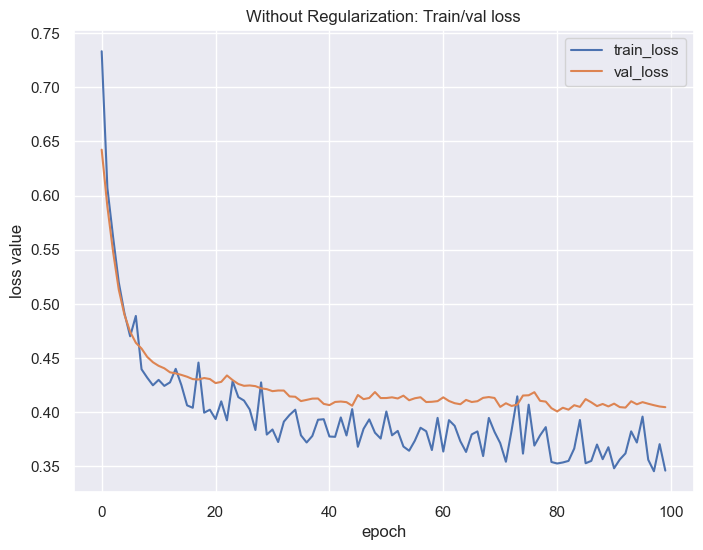

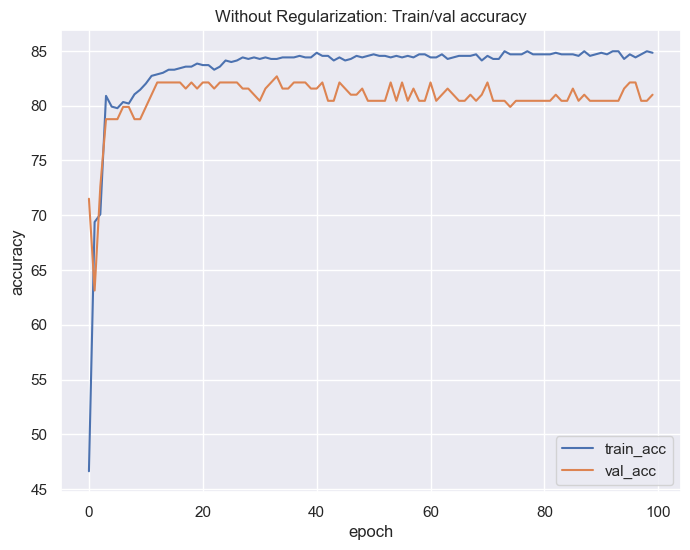

In [12]:
#Hyperparameters
input_dim = X_tensor.shape[1] # 14 features
hidden_dim = 128
lr=0.001
epoch_n=100
loss_fn = nn.CrossEntropyLoss()

# Instantiation of the MLP without any regularization method and send it to device
model=MLP(input_dim, hidden_dim).to(device)
# Optimizer choice
optimizer = optim.Adam(model.parameters(), lr=lr)
# Training (and evaluating) the model
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, optimizer, epoch_n, loss_fn)
# Evaluation, plotting and printing
plot(train_losses, val_losses, train_accuracies, val_accuracies,'Without Regularization')
print('\n',model)

val_mean_loss, val_accuracy = evaluate(model, val_loader, loss_fn) # same values as the last values in the train funct (train func do training and eval at the same time)
print(f"\nFinal Validation Loss (No regularization): {val_mean_loss:.4f}")
print(f"Final Validation Accuracy (No regularization): {val_accuracy:.4f}")

#### 3.5 **(5pts) Train and Evaluate Your MLP Model with Batch Normalization**
1. Use the Same Hyperparameters.
2. Add Batch Normalization:
  - Modify your MLP model from the previous task to include Batch Normalization.
  - You can either:
    - Redefine the same model, but include BatchNorm layers after each linear layer.
    - Or modify the MLP model you implemented earlier using if-else statements and boolean flags to include BatchNorm layers.
3. Train the model using the `train` function defined above.
  - Make sure you name your loss and accuracy variables differently so that we can plot them later 😉

4. Plot the training and validation losses, and training and validation accuracies using the `plot` function.

5. Evaluate the model on the val data using the `evaluate` function and print the final validation loss and accuracy.

❓ **Hint if editing the `MLP` class:**
```
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, use_batchnorm=False):
        super().__init__()
      
      # CODE...
                  nn.BatchNorm1d(hidden_dim) if use_batchnorm else nn.Identity(),

```


Epoch 1/100: train_loss: 0.6563, train_accuracy: 67.6966, val_loss: 0.5887, val_accuracy: 75.4190
Epoch 2/100: train_loss: 0.5165, train_accuracy: 80.0562, val_loss: 0.5012, val_accuracy: 78.7709
Epoch 3/100: train_loss: 0.4495, train_accuracy: 80.7584, val_loss: 0.4449, val_accuracy: 79.3296
Epoch 4/100: train_loss: 0.4260, train_accuracy: 81.3202, val_loss: 0.4280, val_accuracy: 79.8883
Epoch 5/100: train_loss: 0.4087, train_accuracy: 81.7416, val_loss: 0.4179, val_accuracy: 81.0056
Epoch 6/100: train_loss: 0.4124, train_accuracy: 82.5843, val_loss: 0.4116, val_accuracy: 81.0056
Epoch 7/100: train_loss: 0.4120, train_accuracy: 82.8652, val_loss: 0.4145, val_accuracy: 81.0056
Epoch 8/100: train_loss: 0.4283, train_accuracy: 83.1461, val_loss: 0.4108, val_accuracy: 81.5642
Epoch 9/100: train_loss: 0.4037, train_accuracy: 83.1461, val_loss: 0.4106, val_accuracy: 81.5642
Epoch 10/100: train_loss: 0.3900, train_accuracy: 83.9888, val_loss: 0.4083, val_accuracy: 81.5642
Epoch 11/100: train

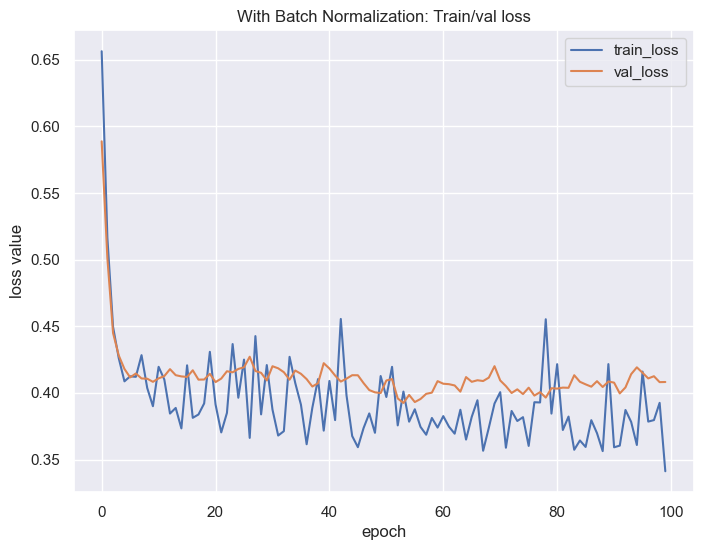

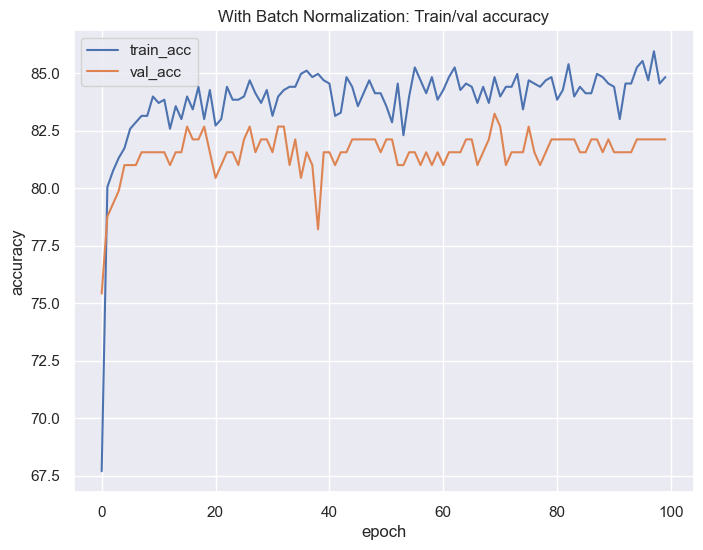

In [13]:
model=MLP(input_dim, hidden_dim,use_batchnorm=True).to(device)

optimizer=optim.Adam(model.parameters(), lr=lr)
train_losses_batchnorm, val_losses_batchnorm, train_accuracies_batchnorm, val_accuracies_batchnorm = train(model, train_loader, val_loader, optimizer, epoch_n, loss_fn)

plot(train_losses_batchnorm, val_losses_batchnorm, train_accuracies_batchnorm, val_accuracies_batchnorm,'With Batch Normalization')
print('\n',model)

val_mean_loss_batch, val_accuracy_batch = evaluate(model, val_loader, loss_fn) # same values as the last values in the train funct list for validation (train func do training and eval at the same time)
print(f"\nFinal Validation Loss (Batch Norm): {val_mean_loss_batch:.4f}")
print(f"Final Validation Accuracy (Batch Norm): {val_accuracy_batch:.4f}")

#### 3.6 **(5pts) Repeat the same process as above with Layer Normalization.**

Epoch 1/100: train_loss: 0.7776, train_accuracy: 39.8876, val_loss: 0.6741, val_accuracy: 59.7765
Epoch 2/100: train_loss: 0.5889, train_accuracy: 64.7472, val_loss: 0.5806, val_accuracy: 68.1564
Epoch 3/100: train_loss: 0.5508, train_accuracy: 73.1742, val_loss: 0.5198, val_accuracy: 80.4469
Epoch 4/100: train_loss: 0.4910, train_accuracy: 79.3539, val_loss: 0.4953, val_accuracy: 78.7709
Epoch 5/100: train_loss: 0.4792, train_accuracy: 80.8989, val_loss: 0.4869, val_accuracy: 79.3296
Epoch 6/100: train_loss: 0.4527, train_accuracy: 80.4775, val_loss: 0.4770, val_accuracy: 80.4469
Epoch 7/100: train_loss: 0.4537, train_accuracy: 81.1798, val_loss: 0.4727, val_accuracy: 80.4469
Epoch 8/100: train_loss: 0.5047, train_accuracy: 81.4607, val_loss: 0.4654, val_accuracy: 79.8883
Epoch 9/100: train_loss: 0.4437, train_accuracy: 81.8820, val_loss: 0.4657, val_accuracy: 81.5642
Epoch 10/100: train_loss: 0.4247, train_accuracy: 82.0225, val_loss: 0.4564, val_accuracy: 81.5642
Epoch 11/100: train

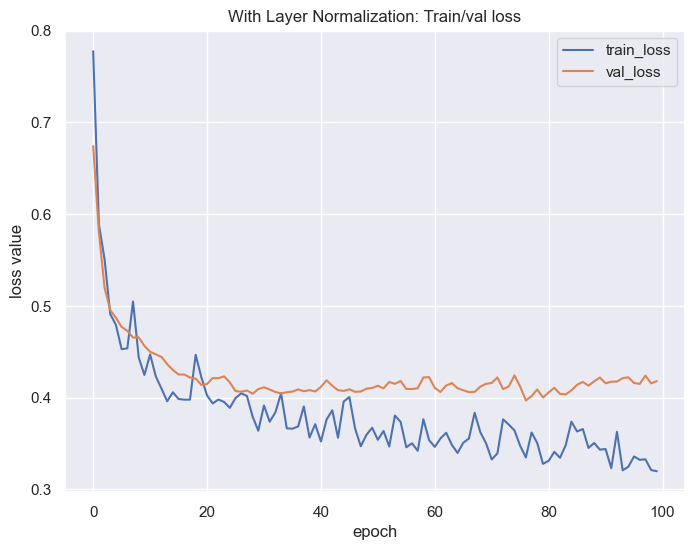

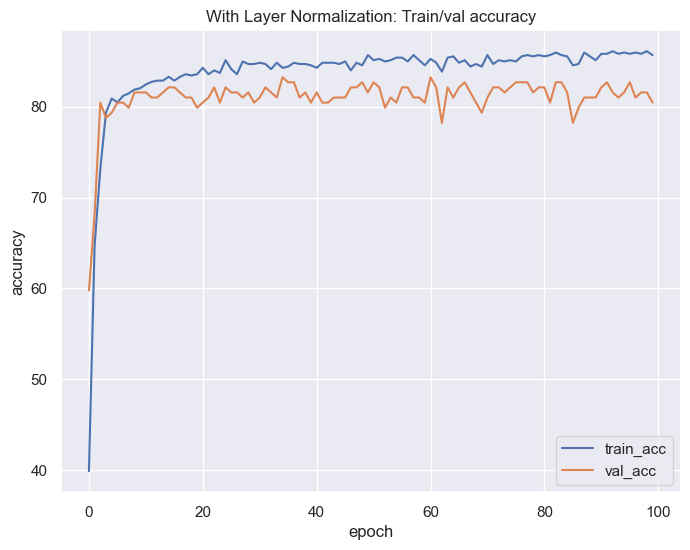

In [14]:
model=MLP(input_dim, hidden_dim,use_layernorm=True).to(device)

optimizer=optim.Adam(model.parameters(), lr=lr)
train_losses_layernorm, val_losses_layernorm, train_accuracies_layernorm, val_accuracies_layernorm = train(model, train_loader, val_loader, optimizer, epoch_n, loss_fn)

plot(train_losses_layernorm, val_losses_layernorm, train_accuracies_layernorm, val_accuracies_layernorm,'With Layer Normalization')
print('\n',model)

val_mean_loss_layer, val_accuracy_layer = evaluate(model, val_loader, loss_fn) # same values as the last values in the train funct list for validation
print(f"\nFinal Validation Loss (Layer Norm): {val_mean_loss_layer:.4f}")
print(f"Final Validation Accuracy (Layer Norm): {val_accuracy_layer:.4f}")

#### 3.7 **(5pts) Repeat the same process as above with Dropout.**

Epoch 1/100: train_loss: 0.7156, train_accuracy: 49.7191, val_loss: 0.6568, val_accuracy: 58.6592
Epoch 2/100: train_loss: 0.6266, train_accuracy: 64.3258, val_loss: 0.6098, val_accuracy: 58.6592
Epoch 3/100: train_loss: 0.5998, train_accuracy: 68.2584, val_loss: 0.5615, val_accuracy: 72.0670
Epoch 4/100: train_loss: 0.5696, train_accuracy: 73.5955, val_loss: 0.5270, val_accuracy: 74.8603
Epoch 5/100: train_loss: 0.5400, train_accuracy: 73.5955, val_loss: 0.5042, val_accuracy: 79.8883
Epoch 6/100: train_loss: 0.5338, train_accuracy: 78.3708, val_loss: 0.4849, val_accuracy: 78.7709
Epoch 7/100: train_loss: 0.4893, train_accuracy: 77.9494, val_loss: 0.4716, val_accuracy: 79.8883
Epoch 8/100: train_loss: 0.4811, train_accuracy: 79.4944, val_loss: 0.4635, val_accuracy: 79.3296
Epoch 9/100: train_loss: 0.4734, train_accuracy: 79.9157, val_loss: 0.4576, val_accuracy: 79.8883
Epoch 10/100: train_loss: 0.4444, train_accuracy: 80.8989, val_loss: 0.4533, val_accuracy: 79.3296
Epoch 11/100: train

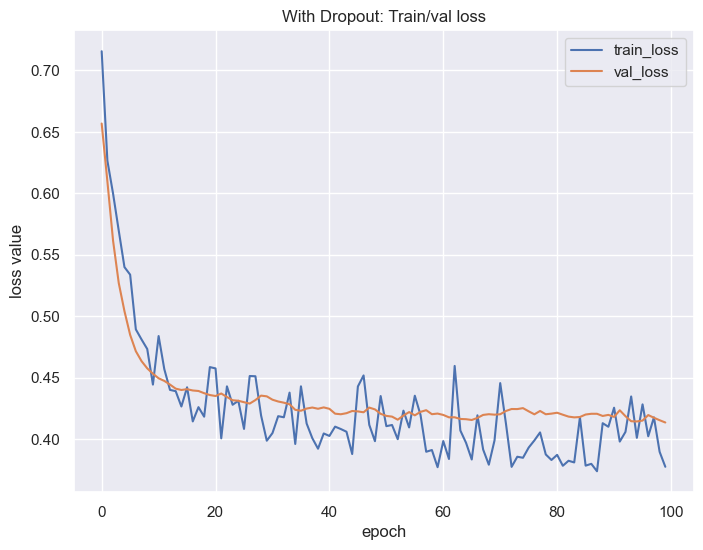

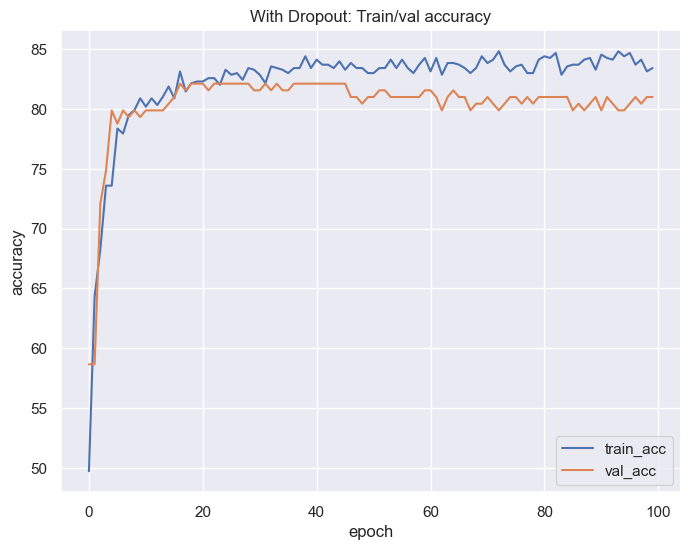

In [15]:
model=MLP(input_dim, hidden_dim,use_dropout=True,p_dropout=0.5).to(device)

optimizer=optim.Adam(model.parameters(), lr=lr)
train_losses_dropout, val_losses_dropout, train_accuracies_dropout, val_accuracies_dropout = train(model, train_loader, val_loader, optimizer, epoch_n, loss_fn)

plot(train_losses_dropout, val_losses_dropout, train_accuracies_dropout, val_accuracies_dropout,'With Dropout')
print('\n',model)

val_mean_loss_drop, val_accuracy_drop = evaluate(model, val_loader, loss_fn) # same values as the last values in the train funct list for validation
print(f"\nFinal Validation Loss (Dropout): {val_mean_loss_drop:.4f}")
print(f"Final Validation Accuracy (Dropout): {val_accuracy_drop:.4f}")

#### 3.8 **(2pts) Display Model Performance for Different Regularization Techniques.**

Replace the question marks with the final values of validation loss and validation accuracy from each of your training results.

In [16]:
table_data = [
    ['Regularization type', 'Val Loss', 'Val accuracy'],
    ['No regularization', val_mean_loss, val_accuracy],  # or val_losses[-1], val_accuracies[-1]
    ['Batch Norm', val_mean_loss_batch, val_accuracy_batch], # or val _losses_batchnorm[-1], val_accuracies_batchnorm[-1]
    ['Layer Norm', val_mean_loss_layer, val_accuracy_layer], # or val_losses_layernorm[-1], val_accuracies_layernorm[-1]
    ['Dropout', val_mean_loss_drop, val_accuracy_drop] # or val_losses_dropout[-1], val_accuracies_dropout[-1]
]
print("{: >20}| {: >20}| {: >20}".format(*table_data[0]))
print('-'.join(['' for i in range(65)]))
for row in table_data[1:]:
    print("{: >20}| {:20.4f}| {: >20}".format(*row))

 Regularization type|             Val Loss|         Val accuracy
----------------------------------------------------------------
   No regularization|               0.4046|    81.00558659217877
          Batch Norm|               0.4082|    82.12290502793296
          Layer Norm|               0.4180|    80.44692737430168
             Dropout|               0.4136|    81.00558659217877


#### 3.9 **(1pt) Replace each question mark with the corresponding validation loss list from your previous trainings.**
Ensure the order of the regularization techniques in the list matches the order of the `reg_types` variable defined below.

In [17]:
loss_curves = [val_losses, val_losses_batchnorm, val_losses_layernorm, val_losses_dropout]
reg_types = ['no regularization', 'batch norm', 'layer norm', 'dropout']

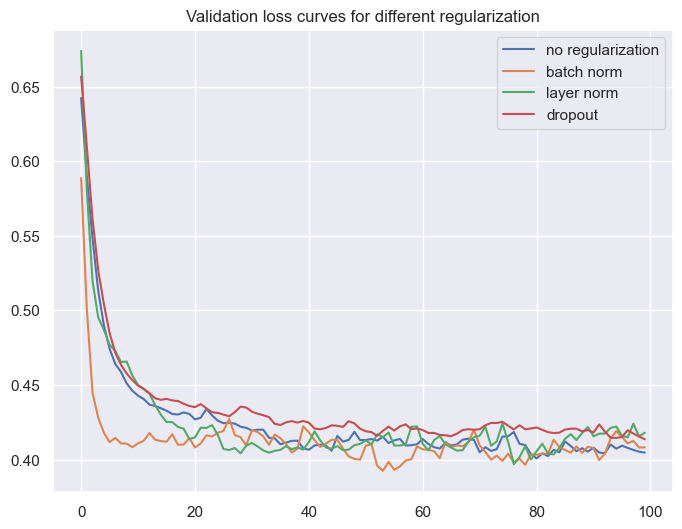

In [18]:
for loss_curve in loss_curves:
    plt.plot(np.arange(len(loss_curve)), loss_curve)
plt.title('Validation loss curves for different regularization')
plt.legend(reg_types);

#### 3.10 **(4pts) Briefly comment on the Final Loss Curves and Effects of Different Regularization Techniques.**

Comment on the final loss curves:

1. How does the validation loss behave compared to the training loss for the model without any regularization? What does this suggest about the model's ability to generalize?

2. How does the use of LayerNorm, BatchNorm, and Dropout affect the training and validation loss curves? Which technique seems to help the model generalize better, and why?

⭐ Specifically for the Titanic dataset, explain why BatchNorm and Dropout may be more effective in reducing overfitting compared to LayerNorm.

**1. How does the validation loss behave compared to the training loss for the model without any regularization?**

* The validation loss stabilizes at a slightly higher value than the training loss and appears smoother/more stable :
- We can see the validation and training losses starting to diverge slightly after 30-40 epochs.

**What does this suggest about the model's ability to generalize?**

* The decrease in training loss while validation loss stagnates indicate that the model is starting to memorize/overfit on the training data.
    * The plateauing of validation loss around 40 epochs tell us that the model has likely stopped learning (ability to generalize has peaked).

**2. How does the use of LayerNorm, BatchNorm, and Dropout affect the training and validation loss curves?**

* Dropout and Batch Normalisation tend to keep/match the validation loss closely and longer to the training loss during the initial epochs than Layer normalisation and then tend to stabilise (keeping a gap).
* Layer Normalisation's validation loss curve appears to diverge from the training loss curve more quickly and continuously than the other two techniques with higher epochs number (less stable, downward trend of training loss with almost constant validation loss).

**Which technique seems to help the model generalize better, and why?**

* Batch Normalization is the better regularization choice here for achieving faster convergence with relatively high accuracy.
    * Batch Norm and Dropout appear to give us slightly better results in terms of validation accuracies (by approximately 1-2 %).
    * However, Batch Norm and Layer Norm both contribute to faster convergence of the losses over epochs/time.

* **Reducing Overfitting:**
    * Batch Normalization's effectiveness is due to its normalization of features across batches (taking into account data from multiple people (groups) instead of just one individual).
        * More effective at capturing the relationships between individual passenger features and the probability of survival based on population/subgroup-level distributions.
        * More relevant/usefull than normalization within a single passenger's data/features, as done in Layer Normalization.<br>
    * Dropout is likely useful due to the relatively small size of the Titanic dataset. It limits the network's capacity, thus reducing overfitting and the memorization of specific training patterns/or the reliance on specific neurons, too much.





In [19]:
print(points) #Good job!

51


---
**Congratulations on completing this assignment!** 🎉  

You’ve successfully explored different regularization techniques, fine-tuned your model, and analyzed the effects on performance. By examining the loss curves and understanding how each method impacts generalization, you’ve deepened your knowledge of model optimization.

Great work, and happy coding! 🚀💻